In [ ]:
#!pip install plotly

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [10]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
font_title = 25
font_label = 15
from pylab import rcParams
rcParams['figure.figsize'] = 20,12

In [11]:
path_data = '../data/shop/'

In [12]:
df_11398 = pd.read_csv(path_data+'11398.csv', sep=';')

In [13]:
df_11398.head(3)

,CheckUID,id_tt_cl,id_tov_cl,Price_retail,Quantity,BasePrice,BaseSum,date_ch,time_ch,order_type,name_tov,name_gr,name_gr2
0,48BC4662-7191-EC11-9064-005056A7A8DF,11398,52,119.09,1.00,119.09,119.09,2022-02-19,13:37:25.0000000,offline,Сметана 25%,Молочная Продукция,Сметана
1,5A5FB96A-8D91-EC11-9064-005056A7A8DF,11398,52,119.09,1.00,95.45,85.91,2022-02-19,16:48:19.0000000,offline,Сметана 25%,Молочная Продукция,Сметана
2,C9228BFF-7891-EC11-9064-005056A7A8DF,11398,52,119.09,1.00,119.09,119.09,2022-02-19,14:31:09.0000000,offline,Сметана 25%,Молочная Продукция,Сметана


In [14]:
# установим формат даты длястолбца с датой
df_11398['date_ch'] = pd.to_datetime(df_11398['date_ch'], format='%Y-%m-%d')

In [15]:
# отсортируем по дате
df_11398 = df_11398.sort_values('date_ch')

In [16]:
# установим индексы датой для временных рядов
df_11398 = df_11398.set_index(pd.DatetimeIndex(df_11398['date_ch']))

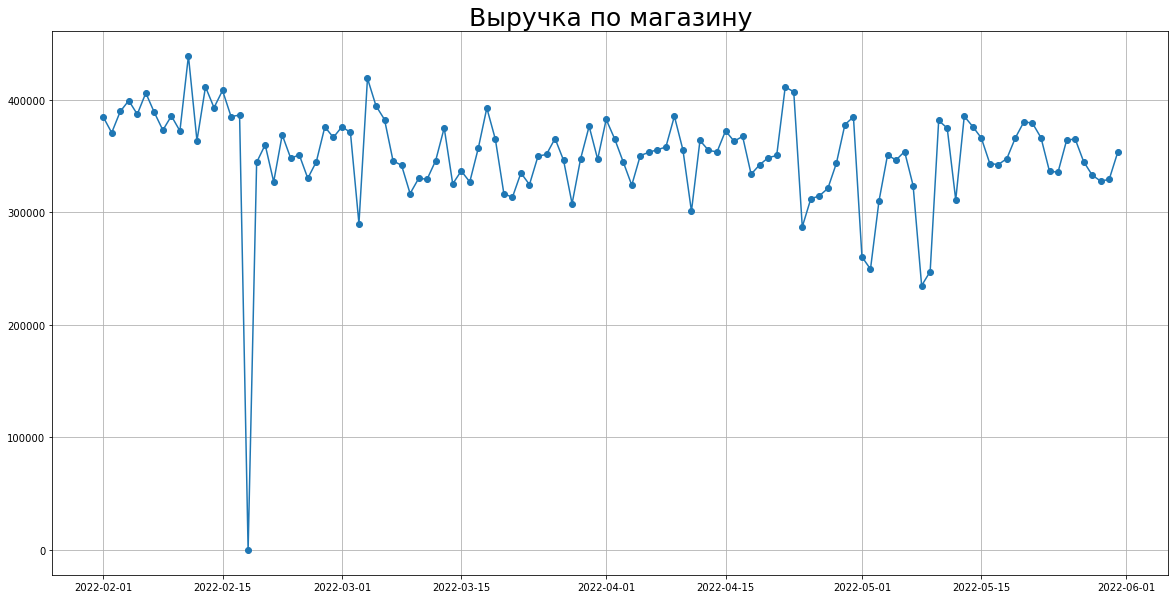

In [33]:
plt.figure(figsize=(20,10))
plt.title('Выручка по магазину', fontsize=font_title)
# в resample('7d') -указываем сколько дней агрегация, можно и другие указать типа 'w' - неделя
plt.plot(df_11398['BaseSum'].resample('d').sum(),  marker='o', label='11398 - 223 кв.м.')
plt.grid()
plt.show()

Разложение Выручки по магазину "11398"


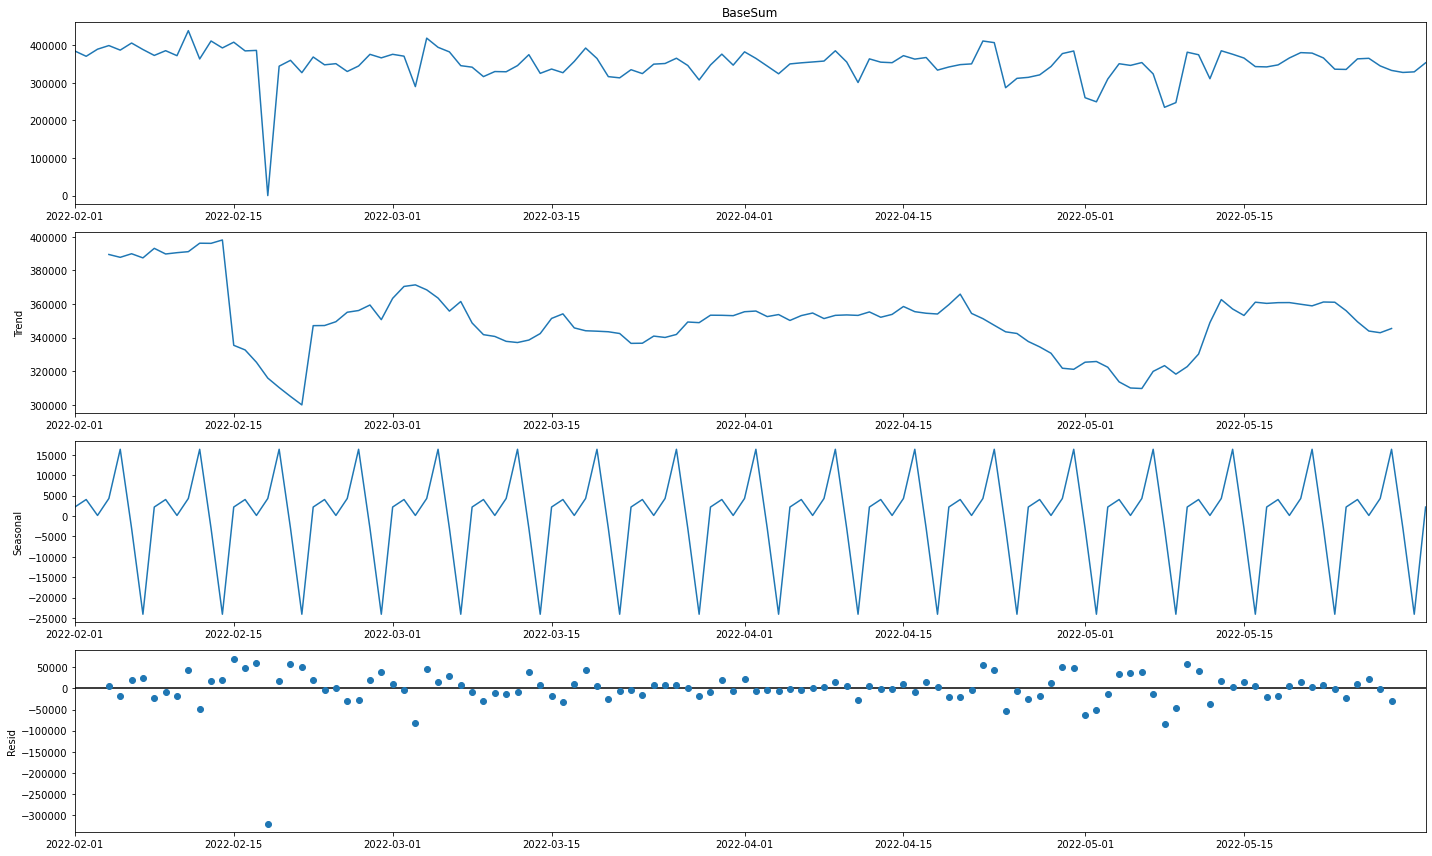

In [42]:
print('Разложение Выручки по магазину "11398"')
decomposition = seasonal_decompose(df_11398['BaseSum'].resample('d').sum(), model='additive')
decomposition.plot()
plt.show()

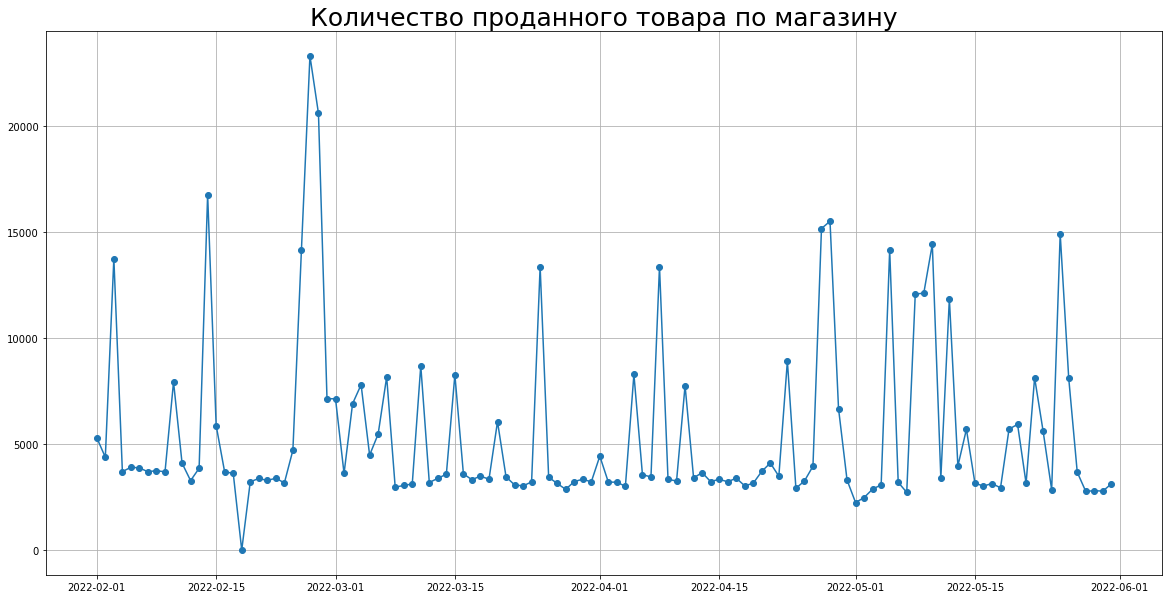

In [43]:
plt.figure(figsize=(20,10))
plt.title('Количество проданного товара по магазину', fontsize=font_title)
plt.plot(df_11398['Quantity'].resample('d').sum(),  marker='o', label='11398 - 223 кв.м.')
plt.grid()
plt.show()

разложение количество проданного товара по "11398"


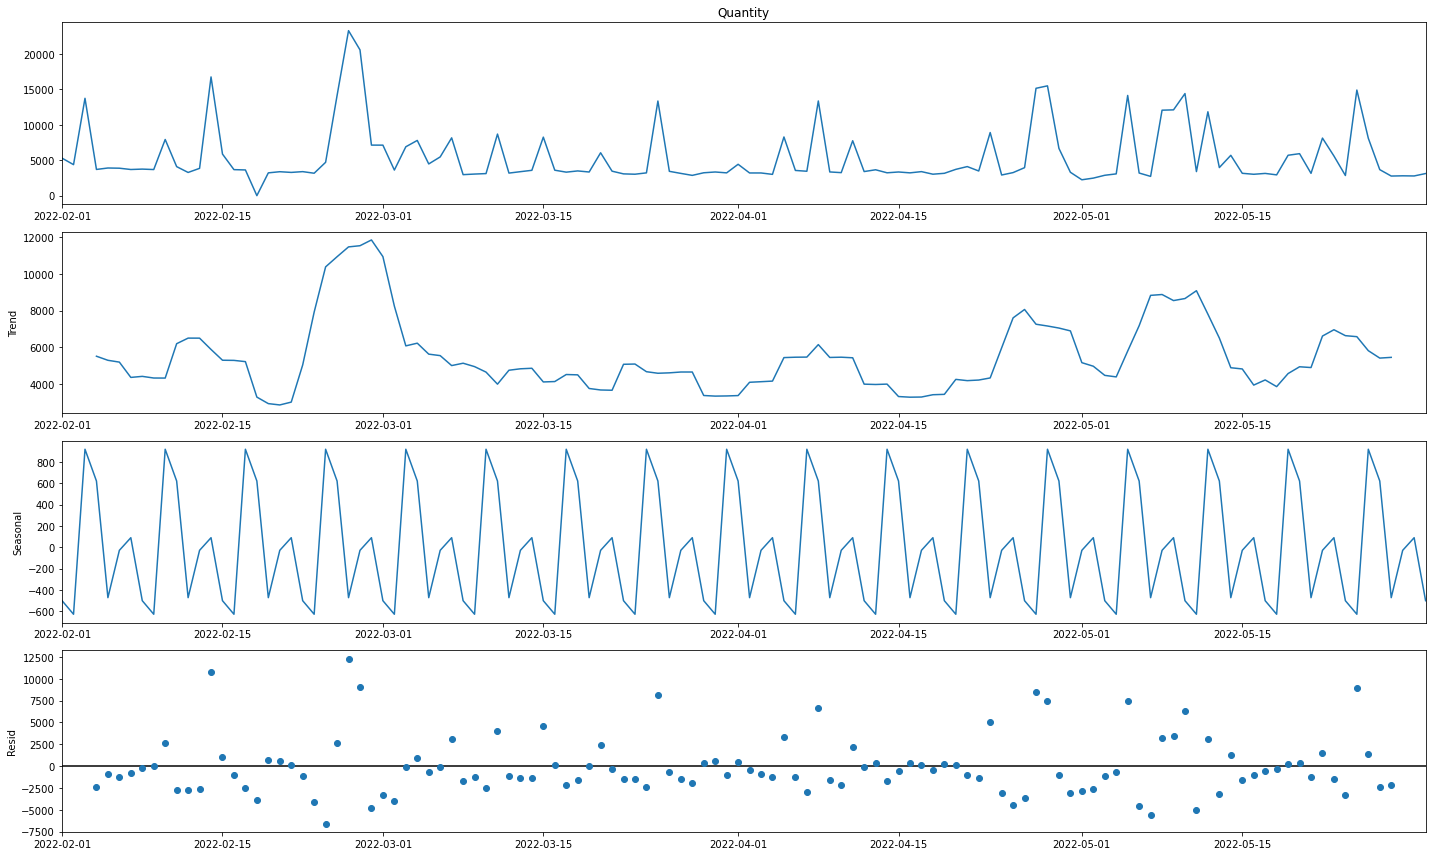

In [41]:
print('разложение количество проданного товара по "11398"')
decomposition = seasonal_decompose(df_11398['Quantity'].resample('d').sum(), model='additive')
decomposition.plot()
plt.show()

разложение количество проданного товара по Кулинария м-н "11398"


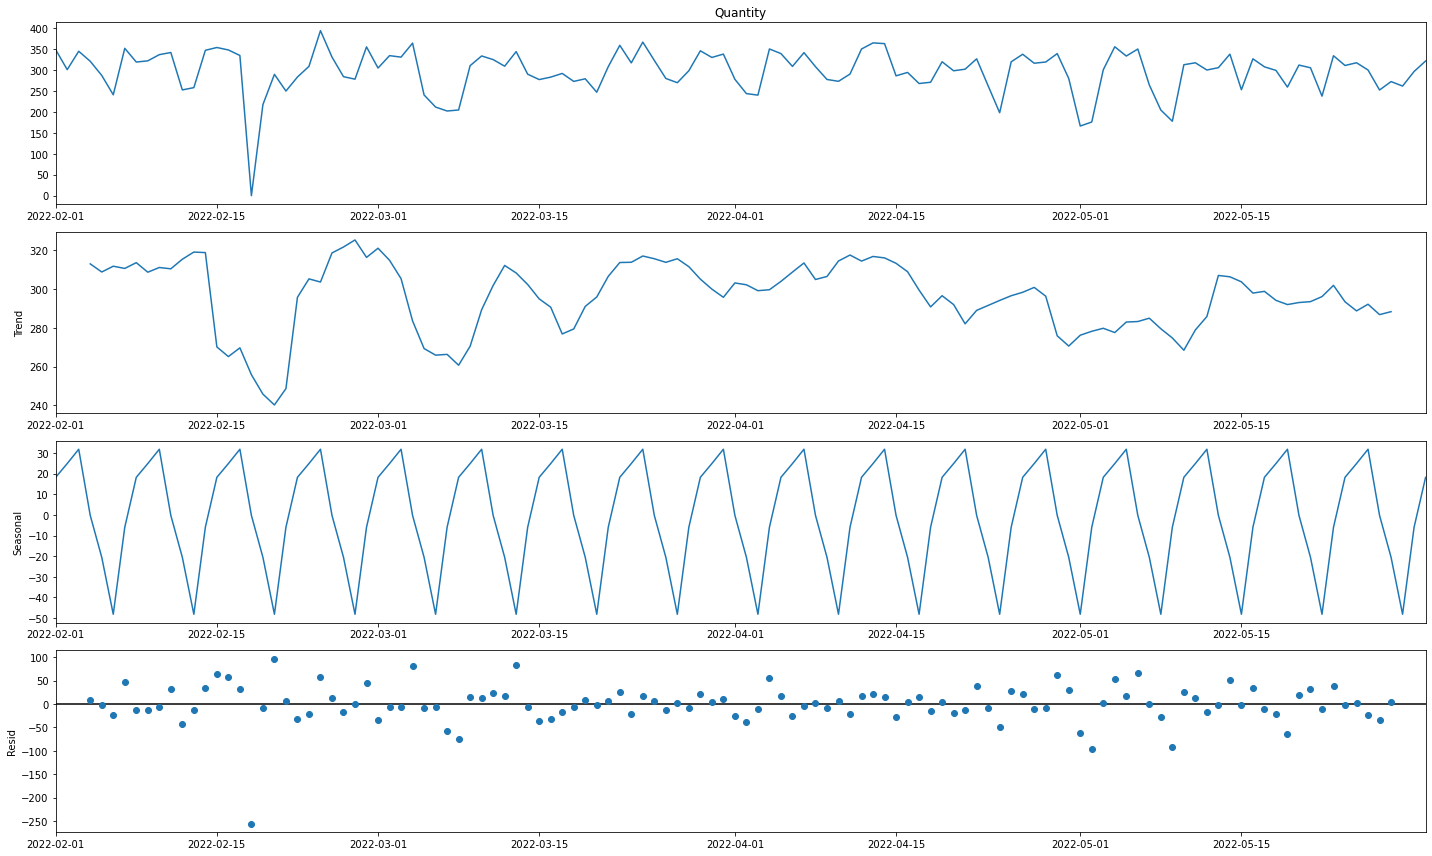

In [19]:
print('разложение количество проданного товара по Кулинария м-н "11398"')
decomposition = seasonal_decompose(df_11398[df_11398['name_gr'] == 'Кулинария']['Quantity'].resample('d').sum(), model='additive')
decomposition.plot()
plt.show()

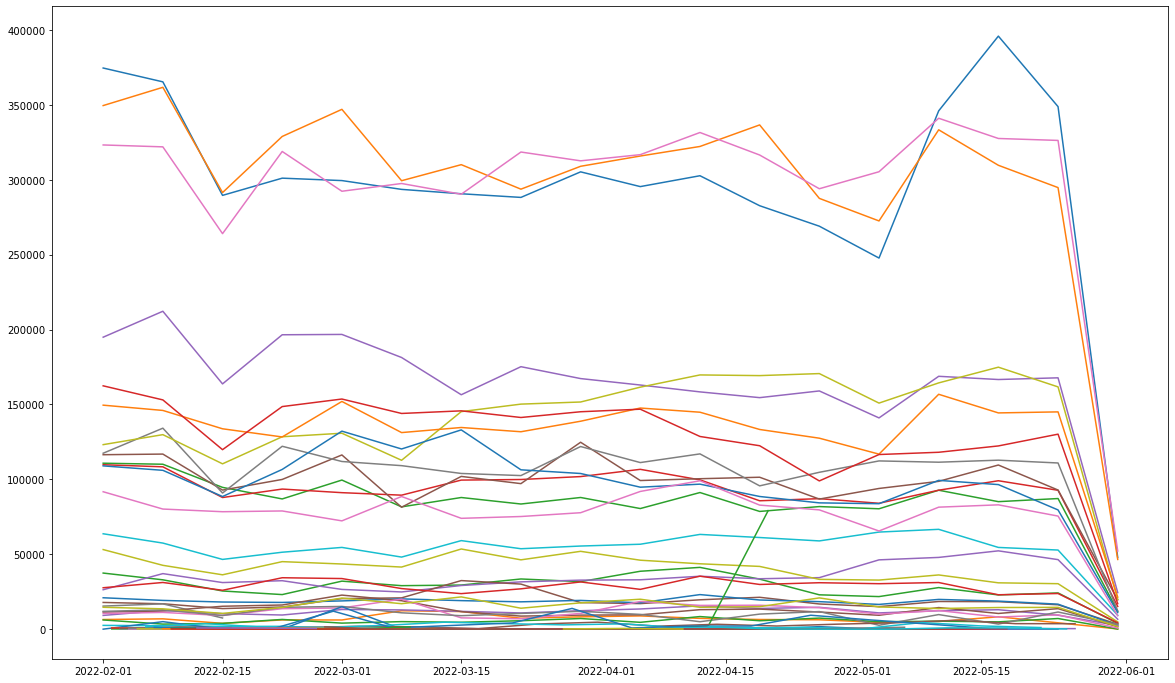

In [20]:
name_gr = df_11398['name_gr'].unique()

for gr in name_gr:
    plt.plot(df_11398[df_11398['name_gr'] == gr]['BaseSum'].resample('7d').sum())

In [21]:
# Количество продаж данного товара - сколько раз его купили за 4 месяца

df_11398['name_gr'].value_counts()

Молочная Продукция                                56149
Овощи. Фрукты. Грибы. Зелень                      39098
Кулинария                                         33021
Хлеб                                              25967
Сладости, кондитерские изделия                    22863
Товары для дома                                   21026
Кафе                                              20536
Бакалея                                           16044
Мясо. Птица. П/ф охл. Яйца                        12343
Напитки                                           10492
Торты, пирожные, десерты                          10421
Рыба. Морепродукты                                 9206
Сыры                                               8146
Мясные деликатесы. Колбасы                         8130
Консервация                                        5497
Замороженные десерты                               5386
Замороженные продукты                              4984
Личная гигиена и уход                           

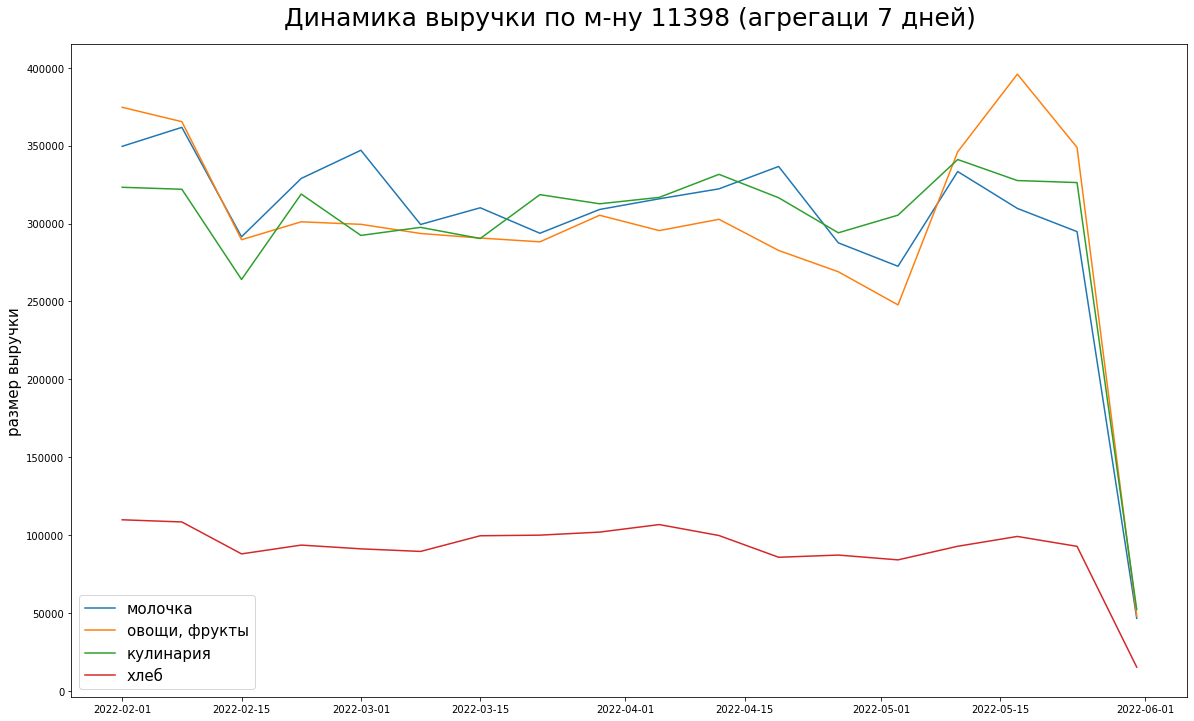

In [22]:
plt.title('Динамика выручки по м-ну 11398 (агрегаци 7 дней)', fontsize=font_title, y=1.02)
plt.plot(df_11398[df_11398['name_gr'] == 'Молочная Продукция']['BaseSum'].resample('7d').sum(), label='молочка')
plt.plot(df_11398[df_11398['name_gr'] == 'Овощи. Фрукты. Грибы. Зелень']['BaseSum'].resample('7d').sum(), label='овощи, фрукты')   
plt.plot(df_11398[df_11398['name_gr'] == 'Кулинария']['BaseSum'].resample('7d').sum(), label='кулинария') 
plt.plot(df_11398[df_11398['name_gr'] == 'Хлеб']['BaseSum'].resample('7d').sum(), label='xлеб') 
plt.ylabel('размер выручки', fontsize=font_label)
plt.legend(loc='lower left', fontsize=font_label)
plt.show()


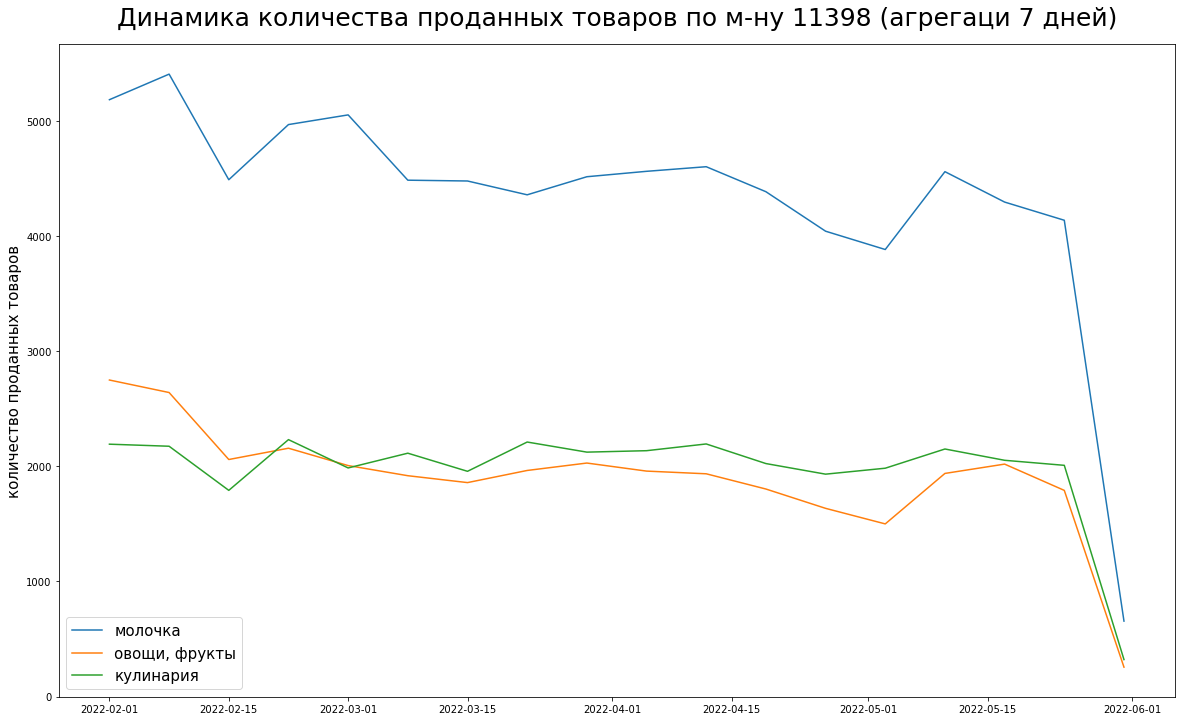

In [23]:
plt.title('Динамика количества проданных товаров по м-ну 11398 (агрегаци 7 дней)', fontsize=font_title, y=1.02)
plt.plot(df_11398[df_11398['name_gr'] == 'Молочная Продукция']['Quantity'].resample('7d').sum(), label='молочка')
plt.plot(df_11398[df_11398['name_gr'] == 'Овощи. Фрукты. Грибы. Зелень']['Quantity'].resample('7d').sum(), label='овощи, фрукты')   
plt.plot(df_11398[df_11398['name_gr'] == 'Кулинария']['Quantity'].resample('7d').sum(), label='кулинария') 
#plt.plot(df_11398[df_11398['name_gr'] == 'Хлеб']['BaseSum'].resample('7d').sum(), label='xлеб') 
plt.ylabel('количество проданных товаров', fontsize=font_label)
plt.legend(loc='lower left', fontsize=font_label)
plt.show()


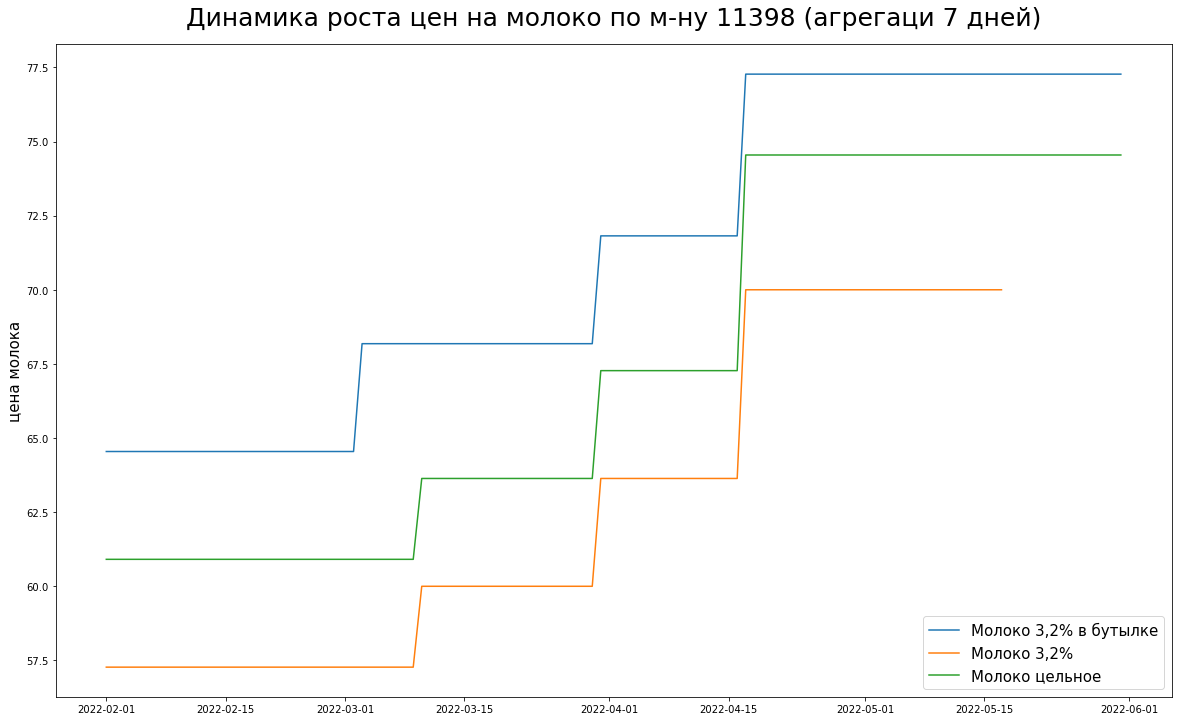

In [24]:
plt.title('Динамика роста цен на молоко по м-ну 11398 (агрегаци 7 дней)', fontsize=font_title, y=1.02)
plt.plot(df_11398[df_11398['name_tov'] == 'Молоко 3,2% в бутылке']['Price_retail'], label='Молоко 3,2% в бутылке')
plt.plot(df_11398[df_11398['name_tov'] == 'Молоко 3,2%']['Price_retail'], label='Молоко 3,2%')
plt.plot(df_11398[df_11398['name_tov'] == 'Молоко цельное']['Price_retail'], label='Молоко цельное')
plt.ylabel('цена молока', fontsize=font_label)
plt.legend(loc='lower right', fontsize=font_label)
plt.show()


In [25]:
df_11398[df_11398['name_tov'] == 'Молоко 3,2% в бутылке']['Price_retail'].value_counts()

77.27    715
64.55    495
68.18    365
71.82    231
Name: Price_retail, dtype: int64

In [26]:
print('1 подорожание на:', 68.18/64.55*100-100)
print('2 подорожание на:',  71.82/68.18*100-100)
print('3 подорожание на:',  77.27/71.82*100-100)
print('общее подорожание на:',  77.27/64.55*100-100)


1 подорожание на: 5.623547637490333
2 подорожание на: 5.33880903490757
3 подорожание на: 7.588415483152318
общее подорожание на: 19.705654531371025


In [27]:
print('Список товаров, которые чаще всего покупают (количество продаж за 4 месяца)')
df_11398['name_tov'].value_counts()[:30]

Список товаров, которые чаще всего покупают (количество продаж за 4 месяца)


Пакет-майка "Избёнка" малый                             18311
Молоко 3,2%                                              3699
Бананы                                                   3077
Молоко цельное                                           2782
Сметана 15%                                              2049
Творог 5%                                                2034
Молоко 3,2% в бутылке                                    1806
Кефир 3,2%                                               1671
Капучино 0.3 (Кафе)                                      1561
Молоко цельное в бутылке                                 1392
Творог 9%                                                1154
Сметана 20%                                              1018
Лук репчатый                                             1012
Кефир 3,2% в бутылке                                      993
Клубника Краснодар                                        966
Круассан миндальный                                       952
Батон на

**Формируем сортированные списки с группировкой по наименованию товаров и товарных групп по месяцам**

Quantity - количество проданных товаров   
BaseSum - выручка от реализации этих товаров


In [60]:
feb_tov = df_11398.loc['2022-02-01': '2022-02-28'].groupby('name_tov')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
feb_gr2 = df_11398.loc['2022-02-01': '2022-02-28'].groupby('name_gr2')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)

march_tov = df_11398.loc['2022-03-01': '2022-03-31'].groupby('name_tov')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
march_gr2 = df_11398.loc['2022-03-01': '2022-03-31'].groupby('name_gr2')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)

apr_tov = df_11398.loc['2022-04-01': '2022-04-30'].groupby('name_tov')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
apr_gr2 = df_11398.loc['2022-04-01': '2022-04-30'].groupby('name_gr2')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)

may_tov = df_11398.loc['2022-05-01': '2022-05-31'].groupby('name_tov')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
may_gr2 = df_11398.loc['2022-05-01': '2022-05-31'].groupby('name_gr2')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)


In [61]:
# топ товаров (установить в скобках) проданных в магазине (количество и сумма)
may_tov[:50]

,Quantity,BaseSum
name_tov,,
Клубника Краснодар,550.91,"308,659.34"
Творог 5%,575.00,"79,041.00"
Молоко цельное,"1,087.00","73,978.28"
Бананы,648.05,"58,955.95"
Капучино 0.3 (Кафе),512.00,"56,617.50"
Филе грудки цыпленка,154.23,"53,829.53"
"Молоко 3,2%",815.00,"53,025.38"
"Молоко 3,2% в бутылке",634.00,"47,735.23"
Творог 9%,283.00,"41,576.91"


In [62]:
# топ подгрупп товаров (установить в скобках) проданных в магазине (количество и сумма)
may_gr2[:50]

,Quantity,BaseSum
name_gr2,,
Ягоды,821.05,"400,448.69"
Вторые блюда,"1,875.00","332,684.02"
Творог классика,"2,428.00","302,276.31"
Кофе и чай для кафе,"2,354.00","276,139.20"
Курица,"1,040.61","272,374.93"
Молоко,"3,496.00","239,416.10"
Кулинария Кафе,"2,207.00","233,801.48"
Сыры полутвердые и твердые,695.98,"207,065.37"
Сэндвичи,"1,354.00","206,694.44"


In [66]:
# Можно менять масштаб
# график выручки от проданных товаров 
labels = may_tov.index
values = may_tov['BaseSum'].values 

fig = go.Figure(data=[go.Bar(x = labels, y = values)])

fig.show()


In [65]:
# Можно менять масштаб
labels = may_gr2.index
values = may_gr2['BaseSum'].values 

fig = go.Figure(data=[go.Bar(x = labels, y = values)])

fig.show()


In [100]:
def top_gr2(df_gr, top=0.8):
    sum_top = df_gr['BaseSum'].sum()*top
    print(top*100, '% выручки - ', sum_top)
    top_list = []
    ne_top = []
    sum_tov = 0
    for i in df_gr.index:
        if sum_tov<sum_top:
            top_list.append({i: np.round(df_gr.loc[i]['BaseSum'])})
            sum_tov += df_gr.loc[i]['BaseSum']
        else:
            ne_top.append({i: np.round(df_gr.loc[i]['BaseSum'])})
    
    return top_list, ne_top

    
    

In [101]:
top_list, ne_top = top_gr2(march_gr2)

80.0 % выручки -  8606380.339975636


In [102]:
top_list

[{'Вторые блюда': 334258.0},
 {'Творог классика': 329495.0},
 {'Курица': 303022.0},
 {'Молоко': 251333.0},
 {'Кофе и чай для кафе': 226392.0},
 {'Сыры полутвердые и твердые': 210325.0},
 {'Томаты': 184403.0},
 {'Кулинария Кафе': 184315.0},
 {'Салаты': 171471.0},
 {'Печенье, галеты, крекеры': 171041.0},
 {'Супы': 158552.0},
 {'Замороженная рыба': 157304.0},
 {'Сэндвичи': 157027.0},
 {'Пельмени.Манты': 147158.0},
 {'Масло': 129287.0},
 {'Торты': 127671.0},
 {'Фрукты': 123898.0},
 {'Цитрусовые': 121402.0},
 {'Сдоба': 114404.0},
 {'Кефир': 111434.0},
 {'Завтраки': 107057.0},
 {'Огурцы': 106524.0},
 {'Зелень': 101709.0},
 {'Выпечка, пироги': 101582.0},
 {'Пиво': 101241.0},
 {'П/ф из мяса': 101227.0},
 {'Деликатесы': 100772.0},
 {'Сметана': 100347.0},
 {'Овощные и бобовые консервы': 99848.0},
 {'Корнеплоды': 93514.0},
 {'Яблоки': 91293.0},
 {'Индейка': 90990.0},
 {'Хлеб на закваске': 84801.0},
 {'Овощи': 82787.0},
 {'Замороженные овощи,грибы,ягоды': 81278.0},
 {'Йогурты ложковые': 80420.0},


In [103]:
ne_top

[{'Детское ложковое молочное питание': 34456.0},
 {'Пюре фруктовое детское питание': 34317.0},
 {'П/ф постные': 33967.0},
 {'Выпечка, печенье кафе': 33884.0},
 {'Вафли': 33843.0},
 {'Детская гигиена': 33121.0},
 {'Паштеты.Риеты': 32992.0},
 {'Рыба холодного копчения': 32796.0},
 {'Груши': 32285.0},
 {'Варенье': 31765.0},
 {'Ресторанные блюда': 31636.0},
 {'Кулинария Дарки': 31199.0},
 {'Соль. Специи': 31144.0},
 {'Влажные салфетки': 29782.0},
 {'Личная гигиена': 29041.0},
 {'Детские напитки': 28904.0},
 {'Замороженные торты': 28751.0},
 {'Колбаса с/к и с/в': 28485.0},
 {'Мармелад': 28449.0},
 {'Сумки, пакеты, упаковка': 27790.0},
 {'Подписки': 26983.0},
 {'Замороженные готовые блюда': 26765.0},
 {'Детская кулинария': 26536.0},
 {'Мед': 26298.0},
 {'Блинчики': 26279.0},
 {'Смузи': 25843.0},
 {'Снеки': 25410.0},
 {'Сыры мягкие': 25295.0},
 {'Сырки творожные': 25264.0},
 {'Сахар. Подсластитель': 25258.0},
 {'Архив Кафе': 24562.0},
 {'Лакомства молочные': 24538.0},
 {'Сладости из орехов и 